In [5]:
import numpy as np

def sigmoid(x):
  # Sigmoid activation function: f(x) = 1 / (1 + e^(-x))
    return 1 / (1 + np.exp(-x))

'''
Update!
(K+1, K+1) = (K , K ) - learningRate * derivative sigmod_F(H(WX,b))
'''

def deriv_sigmoid(x):
  # Derivative of sigmoid: f'(x) = f(x) * (1 - f(x))
    fx = sigmoid(x)
    return fx * (1 - fx)

def mse_loss(y_true, y_pred):
  # y_true and y_pred are numpy arrays of the same length.
    return ((y_true - y_pred) ** 2).mean()

class OurNeuralNetwork:
    '''
    A neural network with:
    - 2 inputs
    - a hidden layer with 2 neurons (h1, h2)
    - an output layer with 1 neuron (o1)

    *** DISCLAIMER ***:
    The code below is intended to be simple and educational, NOT optimal.
    Real neural net code looks nothing like this. DO NOT use this code.
    Instead, read/run it to understand how this specific network works.
    '''

#HL, 2020-9-8: Part A 
# (1) load the saved weights/bias from the file;
# (2) second init function which read/load from the
#     saved/trained weights/bias
    def __init__(self):
        # Weights
        self.w1 = np.random.normal()
        self.w2 = np.random.normal()
        self.w3 = np.random.normal()
        self.w4 = np.random.normal()
        self.w5 = np.random.normal()
        self.w6 = np.random.normal()

        # Biases
        self.b1 = np.random.normal()
        self.b2 = np.random.normal()
        self.b3 = np.random.normal()

# To do: HL 2020-9-8, Part B 
#   (1) change the naming conversion from single 
#       hidden layer to multiple hidden layers 
#       e.g., from h1 -> h_11 (the 1st is for the layer
#       and 2nd is for the 1st neuron on this layer), 
#       to generalize, we have h_1i, for i=1,2,... and
#       h_ki, k=1,0, ..., 
#       k: (for the layer) the kth hidden layer
#       i: (for the neuron on that layer) the ith neuron @ h layer k

    def feedforward(self, x):
        # x is a numpy array with 2 elements.
        h1 = sigmoid(self.w1 * x[0] + self.w2 * x[1] + self.b1)
        h2 = sigmoid(self.w3 * x[0] + self.w4 * x[1] + self.b2)
        o1 = sigmoid(self.w5 * h1 + self.w6 * h2 + self.b3)
        return o1

    def train(self, data, all_y_trues):
        '''
        - data is a (n x 2) numpy array, n = # of samples in the dataset.
        - all_y_trues is a numpy array with n elements.
          Elements in all_y_trues correspond to those in data. 
          '''
        learn_rate = 0.1
        epochs = 1000 # number of times to loop through the entire dataset

        for epoch in range(epochs):
            for x, y_true in zip(data, all_y_trues):
                # --- Do a feedforward (we'll need these values later)
                sum_h1 = self.w1 * x[0] + self.w2 * x[1] + self.b1
                h1 = sigmoid(sum_h1)

                sum_h2 = self.w3 * x[0] + self.w4 * x[1] + self.b2
                h2 = sigmoid(sum_h2)

                sum_o1 = self.w5 * h1 + self.w6 * h2 + self.b3
                o1 = sigmoid(sum_o1)
                y_pred = o1

                # --- Calculate partial derivatives.
                # --- Naming: d_L_d_w1 represents "partial L / partial w1"
                d_L_d_ypred = -2 * (y_true - y_pred)

                # Neuron o1
                d_ypred_d_w5 = h1 * deriv_sigmoid(sum_o1)
                d_ypred_d_w6 = h2 * deriv_sigmoid(sum_o1)
                d_ypred_d_b3 = deriv_sigmoid(sum_o1)

                d_ypred_d_h1 = self.w5 * deriv_sigmoid(sum_o1)
                d_ypred_d_h2 = self.w6 * deriv_sigmoid(sum_o1)

                # Neuron h1
                d_h1_d_w1 = x[0] * deriv_sigmoid(sum_h1)
                d_h1_d_w2 = x[1] * deriv_sigmoid(sum_h1)
                d_h1_d_b1 = deriv_sigmoid(sum_h1)

                # Neuron h2
                d_h2_d_w3 = x[0] * deriv_sigmoid(sum_h2)
                d_h2_d_w4 = x[1] * deriv_sigmoid(sum_h2)
                d_h2_d_b2 = deriv_sigmoid(sum_h2)

        # --- Update weights and biases
        # Neuron h1

# HL 2020-9-7: PART C 
#    (1) Save these trained weights/bias into a file
#        trained_weights_bias.txt 
#        format of the saved data: 
#        w1, w2, b1
#        w3, w4, b2
#        w5, w6, b3 
#    Note: for now just the final converged result 

# HL 2020-9-7, To do PART D 
#     (1) change the naming convension as follows to match up
#         to the hidden layer naming convension 
#       w_ij
#       i: the ith layer 
#       j: the jth neuron on the ith layer 

                self.w1 -= learn_rate * d_L_d_ypred * d_ypred_d_h1 * d_h1_d_w1
                self.w2 -= learn_rate * d_L_d_ypred * d_ypred_d_h1 * d_h1_d_w2
                self.b1 -= learn_rate * d_L_d_ypred * d_ypred_d_h1 * d_h1_d_b1

                # Neuron h2
                self.w3 -= learn_rate * d_L_d_ypred * d_ypred_d_h2 * d_h2_d_w3
                self.w4 -= learn_rate * d_L_d_ypred * d_ypred_d_h2 * d_h2_d_w4
                self.b2 -= learn_rate * d_L_d_ypred * d_ypred_d_h2 * d_h2_d_b2

                # Neuron o1
                self.w5 -= learn_rate * d_L_d_ypred * d_ypred_d_w5
                self.w6 -= learn_rate * d_L_d_ypred * d_ypred_d_w6
                self.b3 -= learn_rate * d_L_d_ypred * d_ypred_d_b3

      # --- Calculate total loss at the end of each epoch
            if epoch % 10 == 0:
                y_preds = np.apply_along_axis(self.feedforward, 1, data)
                loss = mse_loss(all_y_trues, y_preds)
                print("Epoch %d loss: %.3f" % (epoch, loss))

#-----------------------------------
# Define dataset and all_y_trues 
#-----------------------------------
data = np.array([
  [1, 2.5],     # person A
  [1, 3],       # person A
  [2.1, 3.4],   # Person A
  [2.1, 1], # person B
  [3.3, 1], # person B
  [3, 2.3], # person Bs -
# HL 2020-9-7 Part E 
# for the testing of adaptive learning 
# (1) create a new program based on this one, but with init
#     function defined by loading/reading trained weights/biases
# (2) Under the same convergence criteria, NN will stop training
#     when reaching the same loss function, e.g., accuracy
# (3) record the number of EPOCHS N_new, and compare
#     a. the loss function for both programs when stopped training; 
#     b. the EPOCHS number, e.g., N vs. N_new, and hope to 
#        see N > N_new 
])
all_y_trues = np.array([
  1, # person A
  1, # person A
  1, # person A
  0, # person B
  0, # person B
  0, # person B
])

# Train our neural network!
network = OurNeuralNetwork()
network.train(data, all_y_trues)

# Detection
testperson1 = np.array([2, 2.3]) # A person's face 
testperson2 = np.array([3, 2.1]) # Another person's face  
print("person1 : %.3f" % network.feedforward(testperson1))    # 0.951 - F???
print("person2 : %.3f" % (1-network.feedforward(testperson2))) # 0.039 - M???

import datetime
print(datetime.datetime.now());
print("Yoonjung Choi");

Epoch 0 loss: 0.357
Epoch 10 loss: 0.168
Epoch 20 loss: 0.109
Epoch 30 loss: 0.076
Epoch 40 loss: 0.056
Epoch 50 loss: 0.043
Epoch 60 loss: 0.035
Epoch 70 loss: 0.029
Epoch 80 loss: 0.024
Epoch 90 loss: 0.021
Epoch 100 loss: 0.018
Epoch 110 loss: 0.016
Epoch 120 loss: 0.014
Epoch 130 loss: 0.013
Epoch 140 loss: 0.012
Epoch 150 loss: 0.011
Epoch 160 loss: 0.010
Epoch 170 loss: 0.009
Epoch 180 loss: 0.008
Epoch 190 loss: 0.008
Epoch 200 loss: 0.007
Epoch 210 loss: 0.007
Epoch 220 loss: 0.007
Epoch 230 loss: 0.006
Epoch 240 loss: 0.006
Epoch 250 loss: 0.006
Epoch 260 loss: 0.005
Epoch 270 loss: 0.005
Epoch 280 loss: 0.005
Epoch 290 loss: 0.005
Epoch 300 loss: 0.004
Epoch 310 loss: 0.004
Epoch 320 loss: 0.004
Epoch 330 loss: 0.004
Epoch 340 loss: 0.004
Epoch 350 loss: 0.004
Epoch 360 loss: 0.004
Epoch 370 loss: 0.003
Epoch 380 loss: 0.003
Epoch 390 loss: 0.003
Epoch 400 loss: 0.003
Epoch 410 loss: 0.003
Epoch 420 loss: 0.003
Epoch 430 loss: 0.003
Epoch 440 loss: 0.003
Epoch 450 loss: 0.003

## Simple Linear Regression Implementation

In [9]:
import numpy as np
import matplotlib.pyplot as plt

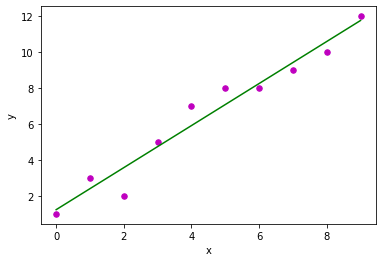

In [10]:
x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
y= np.array([1, 3, 2, 5, 7, 8, 8, 9, 10, 12])

def plot_regression_line(x, y, w):
    # plotting the actual points as scatter plot
    plt.scatter(x, y, color = "m",marker = "o", s = 30)
    y_pred = w[0] + w[1]*x
    plt.plot(x, y_pred, color = "g")
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

def estimate_coef(x, y):
    n = np.size(x)
    m_x = np.mean(x)
    m_y = np.mean(y)
    SS_xy = np.sum(y*x) - n*m_y*m_x
    SS_xx = np.sum(x*x) - n*m_x*m_x
    w_1 = SS_xy / SS_xx
    w_0 = m_y - w_1*m_x  
    return (w_0, w_1)
    

w = estimate_coef(x, y)
plot_regression_line(x, y, w)

iter=0    weight=1.12    bias=1.0200    cost=1.8
iter=10    weight=1.20    bias=1.0446    cost=0.57
iter=20    weight=1.20    bias=1.0551    cost=0.57
iter=30    weight=1.20    bias=1.0651    cost=0.57
iter=40    weight=1.20    bias=1.0745    cost=0.57
iter=50    weight=1.19    bias=1.0835    cost=0.57
iter=60    weight=1.19    bias=1.0919    cost=0.57
iter=70    weight=1.19    bias=1.0998    cost=0.57
iter=80    weight=1.19    bias=1.1073    cost=0.57
iter=90    weight=1.19    bias=1.1145    cost=0.57
1.1881727861263267 1.120509443412633


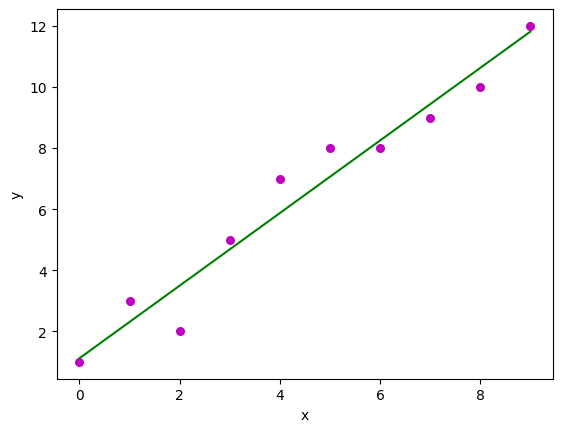

In [106]:
x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
y= np.array([1, 3, 2, 5, 7, 8, 8, 9, 10, 12])

def simple_train(x, y, weight, bias, learning_rate, iters):
        
    for i in range(iters):
       
        pred = weight*x + bias
        weight_deriv = -2*x * (y - pred)
        bias_deriv = -2*(y - pred)

        #update weight and bias
        weight -= (np.sum(weight_deriv) / len(x)) * learning_rate
        bias -= (np.sum(bias_deriv) / len(x)) * learning_rate
        
        
        if i % 10 == 0:
            cost = np.sum((y-pred)**2)/len(x)
            print("iter={:d}    weight={:.2f}    bias={:.4f}    cost={:.2}".format(i, weight, bias, cost))
    return weight, bias


w, b = simple_train(x, y, 1, 1, 0.01, 100)
print(w, b)
plot_regression_line(x, y, [b,w])

iter=0    weight=1.02    bias=0.9200    cost=1.8
iter=10    weight=1.25    bias=0.9147    cost=0.61
iter=20    weight=1.27    bias=0.8949    cost=0.65
iter=30    weight=1.24    bias=0.8667    cost=0.61
iter=40    weight=1.24    bias=0.8486    cost=0.61
iter=50    weight=1.26    bias=0.8271    cost=0.63
iter=60    weight=1.24    bias=0.8059    cost=0.62
iter=70    weight=1.28    bias=0.7938    cost=0.68
iter=80    weight=1.29    bias=0.7728    cost=0.68
iter=90    weight=1.23    bias=0.7530    cost=0.64
1.2968139812589223 0.8451646174979197


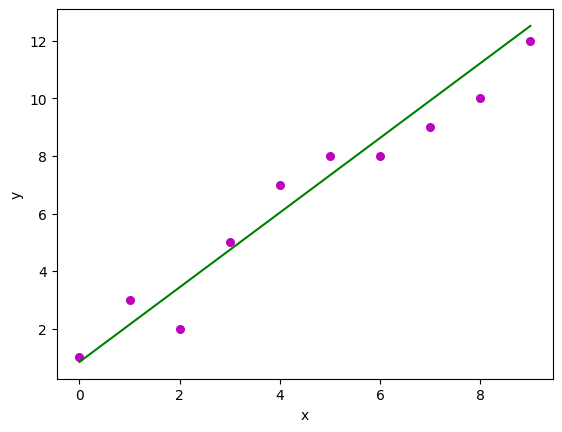

In [105]:
x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
y= np.array([1, 3, 2, 5, 7, 8, 8, 9, 10, 12])

def cost_function(x, y, weight, bias):
    total_error = 0.0
    for i in range(len(x)):
        total_error += (y[i] - (weight*x[i] + bias))**2
    return total_error / len(x)

def lasso_train(x, y, weight, bias, learning_rate, iters, l1_penalty):
    weight_deriv = np.zeros(len(x))
    bias_deriv = np.zeros(len(x))
    
    for j in range(iters):
        
        for i in range(len(x)):
            if weight_deriv[i] > 0:
                weight_deriv[i] = -2*x[i] * (y[i] - (weight*x[i] + bias)) + l1_penalty
            else:
                weight_deriv[i] = -2*x[i] * (y[i] - (weight*x[i] + bias)) - l1_penalty

            if bias_deriv[i] > 0:
                bias_deriv[i] = -2*(y[i] - (weight*x[i] + bias)) + l1_penalty
            else:
                bias_deriv[i] = -2*(y[i] - (weight*x[i] + bias)) - l1_penalty
            
        
        # We subtract because the derivatives point in direction of steepest ascent
        weight -= learning_rate*(np.sum(weight_deriv) / len(x))
        bias -= learning_rate*(np.sum(bias_deriv) / len(x))
        
        if j % 10 == 0:
            cost = cost_function(x, y, weight, bias)
            print("iter={:d}    weight={:.2f}    bias={:.4f}    cost={:.2}".format(j, weight, bias, cost))
        
    return weight, bias


w, b = lasso_train(x, y, 1, 1, 0.01, 100, -10)
print(w, b)
plot_regression_line(x, y, [b,w])

## Logstic Regression

[2.01074714 1.36658883] [-0.35056367 -2.95542023]


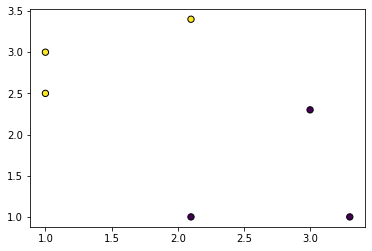

In [25]:
import numpy as np

data = np.array([
  [1, 2.5],     # person A
  [1, 3],       # person A
  [2.1, 3.4],   # Person A
  [2.1, 1], # person B
  [3.3, 1], # person B
  [3, 2.3], # person B
])
all_y_trues = np.array([
  1, # person A
  1, # person A
  1, # person A
  0, # person B
  0, # person B
  0, # person B
])



def sigmoid(x):
  # Sigmoid activation function: f(x) = 1 / (1 + e^(-x))
    return 1 / (1 + np.exp(-x))
'''
Update!
(K+1, K+1) = (K , K ) - learningRate * derivative sigmod_F(H(WX,b))
'''
def deriv_sigmoid(x): 
  # Derivative of sigmoid: f'(x) = f(x) * (1 - f(x))
    fx = sigmoid(x)
    return fx * (1 - fx)

def mse_loss(y_true, y_pred):
  # y_true and y_pred are numpy arrays of the same length.
    return ((y_true - y_pred) ** 2).mean()

class OurLogisticRegression:

    def __init__(self):
        self.weight = np.random.normal()
        self.bias = np.random.normal()

    def feedforward(self, x):
        output = sigmoid(self.weight * x + self.bias)
        return output

    def train(self, data, all_y_trues):

        learn_rate = 0.1
        epochs = 100

        for epoch in range(epochs):

            for x, y_true in zip(data, all_y_trues):
                # --- Do a feedforward (we'll need these values later)
                sum_o1 = self.weight*x + self.bias
                o1 = sigmoid(sum_o1)
                y_pred = o1

                d_L_d_ypred = -2 * (y_true - y_pred)

                # Neuron o1
                d_ypred_d_weight = o1 * deriv_sigmoid(sum_o1)
                d_ypred_d_bias = deriv_sigmoid(sum_o1)


                self.weight -= learn_rate * d_L_d_ypred * d_ypred_d_weight
                self.bias -= learn_rate * d_L_d_ypred * d_ypred_d_bias

            '''
            if epoch % 10 == 0:
                y_preds = np.apply_along_axis(self.feedforward, 1, data)
                loss = mse_loss(all_y_trues, y_preds)
                print("Epoch %d loss: %.3f" % (epoch, loss))
            '''

        return self.weight, self.bias

model = OurLogisticRegression()
w, b = model.train(data, all_y_trues)
print(w, b)

plt.scatter(data[:, 0], data[:, 1], marker="o", c=all_y_trues, s=40, edgecolor="k")
#plt.plot(x, y, color = "g")
plt.show()